# ⚡ Конкурентни радни токови агената са GitHub моделима (Python)

## 📋 Напредни водич за паралелну обраду

Овај нотебук демонстрира **шаблоне конкурентних радних токова** користећи Microsoft Agent Framework. Научићете како да изградите радне токове високе перформансе са паралелном обрадом, где више AI агената ради истовремено, значајно побољшавајући пропусност и омогућавајући сложене пословне процесе са више нити.

## 🎯 Циљеви учења

### 🚀 **Основе конкурентне обраде**
- **Паралелно извршавање агената**: Покрените више агената истовремено за максималну ефикасност
- **Оркестрација радних токова**: Координишите конкурентне операције уз одржавање конзистентности података
- **Оптимизација перформанси**: Постигните значајно убрзање кроз паралелну обраду
- **Управљање ресурсима**: Ефикасно искористите ресурсе AI модела у конкурентним операцијама

### 🏗️ **Напредни шаблони конкурентности**
- **Fork-Join обрада**: Поделите рад на више агената и спојите резултате
- **Паралелизам у цевоводу**: Преклапање фаза извршавања за континуирану пропусност
- **Баланс оптерећења**: Равномерно расподелите рад на доступне ресурсе агената
- **Тачке синхронизације**: Координишите конкурентне агенте у критичним фазама радног тока

### 🏢 **Конкурентне апликације за предузећа**
- **Обрада докумената великог обима**: Истовремена обрада више докумената
- **Анализа садржаја у реалном времену**: Конкурентна анализа долазних токова података
- **Оптимизација серијске обраде**: Максимизирајте пропусност за операције великог обима
- **Мултимодална анализа**: Паралелна обрада различитих типова садржаја (текст, слике, подаци)

## ⚙️ Предуслови и подешавање

### 📦 **Потребне зависности**

Инсталирајте Agent Framework са могућностима конкурентних радних токова:

```bash
pip install agent-framework-core -U
```

### 🔑 **Конфигурација GitHub модела**

**Подешавање окружења (.env датотека):**
```env
GITHUB_TOKEN=your_github_personal_access_token
GITHUB_ENDPOINT=https://models.inference.ai.azure.com
GITHUB_MODEL_ID=gpt-4o-mini
```

**Разматрања за конкурентну обраду:**
- **Ограничења брзине**: Пратите ограничења брзине GitHub Models API за конкурентне захтеве
- **Коришћење ресурса**: Узмите у обзир меморију и употребу CPU-а са више конкурентних агената
- **Руковање грешкама**: Примените робусно опорављање од грешака за паралелне операције

### 🏗️ **Архитектура конкурентних радних токова**

```mermaid
graph TD
    A[Workflow Start] --> B[Concurrent Execution]
    B --> C[Agent Pool 1]
    B --> D[Agent Pool 2]
    B --> E[Agent Pool 3]
    C --> F[Result Aggregation]
    D --> F
    E --> F
    F --> G[Final Output]
    
    H[GitHub Models API] --> C
    H --> D
    H --> E
```

**Кључне предности:**
- **⚡ Перформансе**: Значајно убрзање кроз паралелно извршавање
- **📈 Скалабилност**: Обрадите повећане радне оптерећења без пропорционалног повећања времена
- **🔄 Ефикасност**: Боља искоришћеност доступних рачунарских ресурса
- **🎯 Пропусност**: Обрадите више посла у истом временском периоду

## 🎨 **Шаблони дизајна конкурентних радних токова**

### 🔍 **Цевовод за истраживање и анализу**
```
Research Task → Parallel Research Agents → Content Synthesis → Quality Review
```

### 📊 **Радни ток обраде података**
```
Input Data → Concurrent Processing Agents → Result Aggregation → Final Report
```

### 🎭 **Цевовод за креирање садржаја**
```
Content Brief → Parallel Content Generators → Review & Merge → Final Content
```

### 🔄 **Обрада у више фаза**
```
Input → Stage 1 (Concurrent) → Stage 2 (Concurrent) → Stage 3 (Sequential) → Output
```

## 🏢 **Предности перформанси за предузећа**

### ⚡ **Оптимизација пропусности**
- **Паралелно извршавање**: Више агената ради истовремено
- **Искоришћеност ресурса**: Максимална ефикасност капацитета доступних AI модела
- **Смањење времена**: Значајно смањење укупног времена обраде
- **Скалабилна архитектура**: Лако додајте више конкурентних агената по потреби

### 🛡️ **Поузданост и отпорност**
- **Толеранција на грешке**: Неуспех појединачног агента не зауставља цео радни ток
- **Изолација грешака**: Проблеми у једној конкурентној грани не утичу на друге
- **Грациозно деградирање**: Систем наставља да ради чак и са смањеним капацитетом агената
- **Механизми опоравка**: Аутоматско поновно покретање и руковање грешкама за неуспеле операције

### 📊 **Праћење и посматрање**
- **Праћење конкурентног извршавања**: Пратите напредак свих паралелних операција
- **Метрике перформанси**: Мерите убрзање и добитке у ефикасности
- **Аналитика коришћења ресурса**: Оптимизујте расподелу конкурентних агената
- **Идентификација уских грла**: Пронађите и решите ограничења перформанси

Хајде да изградимо конкурентне AI радне токове високе перформансе! 🚀


In [1]:
! pip install agent-framework-core -U

In [2]:
import os
from typing import Any

from agent_framework import ChatMessage, ConcurrentBuilder,WorkflowViz
from agent_framework.openai import OpenAIChatClient

In [3]:
chat_client = OpenAIChatClient(base_url=os.environ.get("GITHUB_ENDPOINT"), api_key=os.environ.get("GITHUB_TOKEN"), model_id="gpt-4o" )

In [4]:
ResearcherAgentName = "Researcher-Agent"
ResearcherAgentInstructions = "You are my travel researcher, working with me to analyze the destination, list relevant attractions, and make detailed plans for each attraction."

In [5]:
PlanAgentName = "Plan-Agent"
PlanAgentInstructions = "You are my travel planner, working with me to create a detailed travel plan based on the researcher's findings."

In [6]:
research_agent   = chat_client.create_agent(
        instructions=(
           ResearcherAgentInstructions
        ),
        name=ResearcherAgentName,
    )

plan_agent = chat_client.create_agent(
        instructions=(
            PlanAgentInstructions
        ),
        name=PlanAgentName,
    )

In [7]:
workflow = ConcurrentBuilder().participants([research_agent, plan_agent]).build()

In [8]:
print("Generating workflow visualization...")
viz = WorkflowViz(workflow)
# Print out the mermaid string.
print("Mermaid string: \n=======")
print(viz.to_mermaid())
print("=======")
# Print out the DiGraph string.
print("DiGraph string: \n=======")
print(viz.to_digraph())
print("=======")
svg_file = viz.export(format="svg")
print(f"SVG file saved to: {svg_file}")

Generating workflow visualization...
Mermaid string: 
flowchart TD
  dispatcher["dispatcher (Start)"];
  Researcher_Agent["Researcher-Agent"];
  Plan_Agent["Plan-Agent"];
  aggregator["aggregator"];
  fan_in__aggregator__69d73de8((fan-in))
  Plan_Agent --> fan_in__aggregator__69d73de8;
  Researcher_Agent --> fan_in__aggregator__69d73de8;
  fan_in__aggregator__69d73de8 --> aggregator;
  dispatcher --> Researcher_Agent;
  dispatcher --> Plan_Agent;
DiGraph string: 
digraph Workflow {
  rankdir=TD;
  node [shape=box, style=filled, fillcolor=lightblue];
  edge [color=black, arrowhead=vee];

  "dispatcher" [fillcolor=lightgreen, label="dispatcher\n(Start)"];
  "Researcher-Agent" [label="Researcher-Agent"];
  "Plan-Agent" [label="Plan-Agent"];
  "aggregator" [label="aggregator"];

  "fan_in::aggregator::69d73de8" [shape=ellipse, fillcolor=lightgoldenrod, label="fan-in"];
  "Plan-Agent" -> "fan_in::aggregator::69d73de8";
  "Researcher-Agent" -> "fan_in::aggregator::69d73de8";
  "fan_in::aggre

Attempting to display SVG file at: C:\Users\kinfeylo\AppData\Local\Temp\tmpoq68cqjk.svg


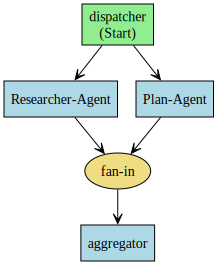

In [9]:
from IPython.display import SVG, display, HTML
import os

print(f"Attempting to display SVG file at: {svg_file}")

if svg_file and os.path.exists(svg_file):
    try:
        # Preferred: direct SVG rendering
        display(SVG(filename=svg_file))
    except Exception as e:
        print(f"⚠️ Direct SVG render failed: {e}. Falling back to raw HTML.")
        try:
            with open(svg_file, "r", encoding="utf-8") as f:
                svg_text = f.read()
            display(HTML(svg_text))
        except Exception as inner:
            print(f"❌ Fallback HTML render also failed: {inner}")
else:
    print("❌ SVG file not found. Ensure viz.export(format='svg') ran successfully.")

In [10]:
events = await workflow.run("Plan a trip to Seattle in December")
outputs = events.get_outputs()

In [11]:
if outputs:
        print("===== Final Aggregated Conversation (messages) =====")
        for output in outputs:
            messages: list[ChatMessage] | Any = output
            for i, msg in enumerate(messages, start=1):
                name = msg.author_name if msg.author_name else "user"
                print(f"{'-' * 60}\n\n{i:02d} [{name}]:\n{msg.text}")

===== Final Aggregated Conversation (messages) =====
------------------------------------------------------------

01 [user]:
Plan a trip to Seattle in December
------------------------------------------------------------

02 [Researcher-Agent]:
Seattle is a wonderful place to visit in December, with vibrant winter festivities, seasonal attractions, and gorgeous views of the Pacific Northwest. Despite the chilly weather and occasional rain, Seattle’s charm shines through its indoor and outdoor attractions. Here's a detailed plan for your trip:

---

### **Destination Overview: Seattle in December**
- **Weather**: Expect average highs of around 47°F (8°C) and lows near 37°F (3°C). Rain is frequent, so bring waterproof clothing.
- **Packing List**:
  - Warm layers (sweaters, coats, gloves, and hats).
  - Comfortable walking shoes (water-resistant is ideal).
  - Umbrella or rain jacket.

---

### **Day 1: Exploring Downtown Seattle**
#### **Morning**: **Pike Place Market**
- One of Seattl


---

**Одрицање од одговорности**:  
Овај документ је преведен коришћењем услуге за превођење помоћу вештачке интелигенције [Co-op Translator](https://github.com/Azure/co-op-translator). Иако се трудимо да обезбедимо тачност, молимо вас да имате у виду да аутоматски преводи могу садржати грешке или нетачности. Оригинални документ на његовом изворном језику треба сматрати ауторитативним извором. За критичне информације препоручује се професионални превод од стране људи. Не преузимамо одговорност за било каква погрешна тумачења или неспоразуме који могу настати услед коришћења овог превода.
